In [ ]:
# !pip install numpy pandas matplotlib opencv-python tensorflow keras keras-tuner scikit-learn


In [ ]:

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import cv2
# import pathlib
# import random
# import pickle
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, Sequential
# from sklearn.model_selection import train_test_split

# # Path to dataset folder
# data_dir = pathlib.Path('./rice_leaf_diseases')

# # Label dictionary for the classes
# labels_dict = {
#     'bacteria': 0,
#     'brown': 1,
#     'smut': 2,
# }

# # Create a dictionary containing images of each disease
# image_dict = {
#     "bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
#     "brown": list(data_dir.glob("Brown spot/*")),
#     "smut": list(data_dir.glob("Leaf smut/*")),
# }

# # Prepare dataset X (images) and y (labels)
# X, y = [], []

# for name, images in image_dict.items():
#     for image in images:
#         img = cv2.imread(str(image))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#         resized_img = cv2.resize(img, (180, 180))
#         X.append(resized_img)
#         y.append(labels_dict[name])

# X = np.array(X)
# y = np.array(y)

# # Split dataset into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# # Normalize the images
# X_train_scaled = X_train / 255.0
# X_val_scaled = X_val / 255.0
# X_test_scaled = X_test / 255.0

# # Data Augmentation Pipeline
# data_augmentation = Sequential([
#     layers.RandomZoom(0.2),
#     layers.RandomRotation(0.1),
#     layers.RandomFlip("horizontal")
# ])

# # Build the CNN Model (removed LSTM since images are not sequences)
# num_classes = 3

# model = Sequential([
#     data_augmentation,

#     # CNN Layers for feature extraction
#     layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),

#     # Flatten the CNN output
#     layers.Flatten(),

#     # Fully connected layers
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax')  # Added softmax activation
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# # Implement Early Stopping to prevent overfitting
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=5, restore_best_weights=True
# )

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=40, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
# print(f"Test Accuracy: {test_acc:.2f}")

# # ✅ Save Model as .pkl
# with open("rice_leaf_disease_model.pkl", "wb") as f:
#     pickle.dump({"model_json": model.to_json(), "weights": model.get_weights()}, f)

# print("Model saved as .pkl successfully!")

# # ✅ Load Model from .pkl
# from tensorflow.keras.models import model_from_json

# with open("rice_leaf_disease_model.pkl", "rb") as f:
#     data = pickle.load(f)

# # Recreate model from JSON
# model = model_from_json(data["model_json"])
# model.set_weights(data["weights"])

# print("Model loaded successfully from .pkl!")

# # Make predictions on the test set
# predictions = model.predict(X_test_scaled)

# # Random image prediction
# all_images = list(data_dir.glob("*/*"))
# random_image_path = random.choice(all_images)

# # Load and preprocess the random image
# new_image = cv2.imread(str(random_image_path))
# new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
# new_image = cv2.resize(new_image, (180, 180))
# new_image = new_image / 255.0
# new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# # Predict the class for the new image
# labels_dict1 = {0: "Bacterial Leaf Blight", 1: "Brown Spot", 2: "Leaf Smut"}
# predicted_value = model.predict(new_image)
# predicted_class = np.argmax(predicted_value)
# predicted_label = labels_dict1[predicted_class]

# print(f"Predicted Class: {predicted_label}")

# # Display the image and its predicted label
# plt.axis('off')
# plt.imshow(new_image[0])
# plt.title(f"Predicted: {predicted_label}")
# plt.show()


In [12]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

# Input and output folders
input_dir = "./rice_leaf_diseases"
output_dir = "./augmented1_rice_leaf_diseases"

# Create ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# How many augmented images per original?
num_augmented_images = 5

# Loop through each class folder
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    output_category_path = os.path.join(output_dir, category)
    os.makedirs(output_category_path, exist_ok=True)

    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)  # Add batch dimension

        # Generate and save images
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_category_path,
                                  save_prefix=category.replace(" ", "_"), save_format='jpeg'):
            i += 1
            if i >= num_augmented_images:
                break  # Stop after saving required number


Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 455ms/step - accuracy: 0.3542 - loss: 1.4612 - val_accuracy: 0.2895 - val_loss: 1.3593
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.3346 - loss: 1.2285 - val_accuracy: 0.5263 - val_loss: 1.0860
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.4271 - loss: 1.0876 - val_accuracy: 0.5789 - val_loss: 1.0679
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.5660 - loss: 1.0484 - val_accuracy: 0.2895 - val_loss: 1.0708
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.3060 - loss: 1.0825 - val_accuracy: 0.4474 - val_loss: 1.0173
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.5482 - loss: 0.9810 - val_accuracy: 0.5263 - val_loss: 0.9805
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.5208 - loss: 0.9725 - val_accuracy: 0.4474 - val_loss: 0.9611
Epoch 8/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.4861 - loss: 0.9648 - val_accuracy: 0.4474 - val_loss:

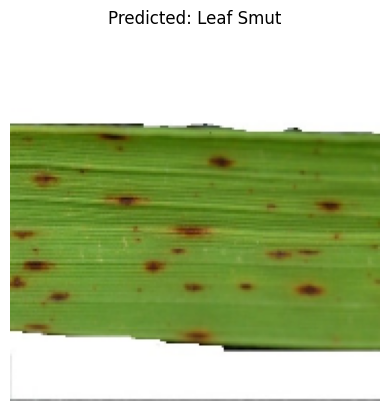

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pathlib
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split

# Path to dataset folder
data_dir = pathlib.Path('./rice_leaf_diseases')

# Label dictionary for the classes
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
}

# Reverse mapping for predictions
labels_dict1 = {0: "Bacterial Leaf Blight", 1: "Brown Spot", 2: "Leaf Smut"}

# Create dictionary of image paths
image_dict = {
    "bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
    "brown": list(data_dir.glob("Brown spot/*")),
    "smut": list(data_dir.glob("Leaf smut/*")),
}

# Prepare dataset
X, y = [], []

for name, images in image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (180, 180))
        X.append(img)
        y.append(labels_dict[name])

X = np.array(X)
y = np.array(y)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# Normalize the images
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Data Augmentation
data_augmentation = Sequential([
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal")
])

# Build CNN model
num_classes = 3

model = Sequential([
    layers.Input(shape=(180, 180, 3)),
    data_augmentation,

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train the model
model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate on test set
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.2f}")

# ✅ Save model in .keras format (recommended)
model.save("rice_leaf_disease_model.keras")
print("✅ Model saved as rice_leaf_disease_model.keras")

# ✅ Load the model
loaded_model = tf.keras.models.load_model("rice_leaf_disease_model.keras")
print("✅ Model loaded successfully!")

# -------------------------------
# 🔮 Predict on a new random image
# -------------------------------

all_images = list(data_dir.glob("*/*"))
random_image_path = random.choice(all_images)

# Load and preprocess image
new_image = cv2.imread(str(random_image_path))
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
new_image_resized = cv2.resize(new_image, (180, 180))
input_image = new_image_resized / 255.0
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Predict
prediction = loaded_model.predict(input_image)
predicted_class = np.argmax(prediction)
predicted_label = labels_dict1[predicted_class]

# Display result
plt.imshow(new_image_resized)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step


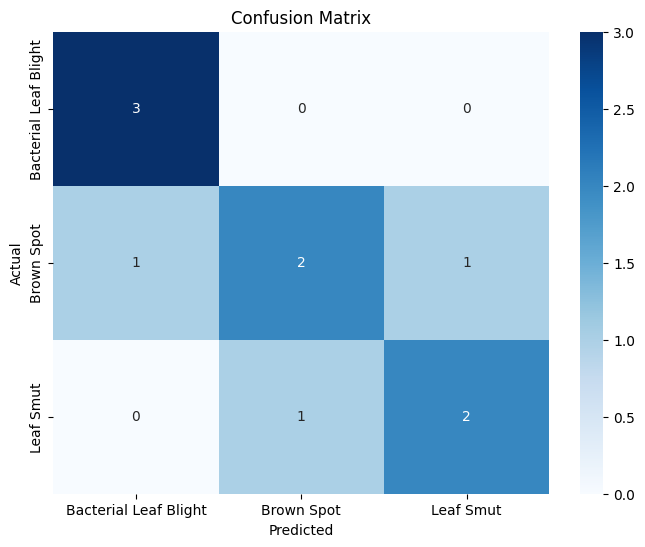


📋 Classification Report:

                       precision    recall  f1-score   support

Bacterial Leaf Blight       0.75      1.00      0.86         3
           Brown Spot       0.67      0.50      0.57         4
            Leaf Smut       0.67      0.67      0.67         3

             accuracy                           0.70        10
            macro avg       0.69      0.72      0.70        10
         weighted avg       0.69      0.70      0.69        10



In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = list(labels_dict1.values())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Epoch 1/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - accuracy: 0.3585 - loss: 1.1805 - val_accuracy: 0.4154 - val_loss: 1.0307
Epoch 2/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.4711 - loss: 1.0093 - val_accuracy: 0.4781 - val_loss: 0.9121
Epoch 3/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.5253 - loss: 0.9134 - val_accuracy: 0.5146 - val_loss: 0.9343
Epoch 4/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.5871 - loss: 0.8658 - val_accuracy: 0.5908 - val_loss: 0.8688
Epoch 5/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.6432 - loss: 0.7949 - val_accuracy: 0.5553 - val_loss: 0.9159
Epoch 6/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.6442 - loss: 0.7664 - val_accuracy: 0.6534 - val_loss: 0.6922
Epoch 7/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.7100 - loss: 0.6660 - val_accuracy: 0.6837 - val_loss: 0.6991
Epoch 8/40
57/57 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - accuracy: 0.7343 - loss: 0.6132 - val_accu

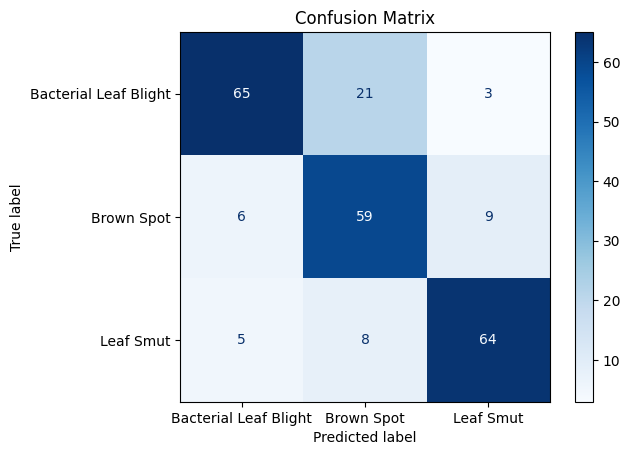

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


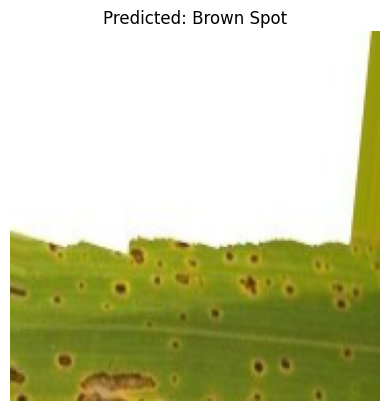

In [1]:
# model 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pathlib
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Set random seed
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Path to dataset folder
data_dir = pathlib.Path('./augmented1_rice_leaf_diseases')

# Labels
labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
}
labels_dict1 = {0: "Bacterial Leaf Blight", 1: "Brown Spot", 2: "Leaf Smut"}

# Load images
image_dict = {
    "bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
    "brown": list(data_dir.glob("Brown spot/*")),
    "smut": list(data_dir.glob("Leaf smut/*")),
}

# Manual augmentation function
def augment_image(img):
    augmented = []

    # Flip
    flipped = tf.image.flip_left_right(img)
    augmented.append(flipped.numpy())

    # Rotate
    rotated = tf.image.rot90(img)
    augmented.append(rotated.numpy())

    # Zoom (crop center and resize)
    zoomed = tf.image.central_crop(img, central_fraction=0.8)
    zoomed = tf.image.resize(zoomed, (180, 180))
    augmented.append(zoomed.numpy())

    # Brightness
    bright = tf.image.adjust_brightness(img, delta=0.1)
    augmented.append(bright.numpy())

    return augmented

# Prepare dataset
X, y = [], []

for name, images in image_dict.items():
    label = labels_dict[name]
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (180, 180))
        X.append(img)
        y.append(label)

        # Add augmented versions
        for aug in augment_image(img):
            X.append(aug)
            y.append(label)

X = np.array(X)
y = np.array(y)

# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# Normalize
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Build CNN model (no built-in augmentation)
num_classes = 3
model = Sequential([
    layers.Input(shape=(180, 180, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train
history = model.fit(
    X_train, y_train,
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.2f}")

# Save
model.save("rice_leaf_disease_model.keras")
print("✅ Model saved.")

# Predict and Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bacterial Leaf Blight", "Brown Spot", "Leaf Smut"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Predict a random image
all_images = list(data_dir.glob("*/*"))
random_image_path = random.choice(all_images)

img = cv2.imread(str(random_image_path))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(img, (180, 180))
input_img = np.expand_dims(resized / 255.0, axis=0)

pred = model.predict(input_img)
label = np.argmax(pred)
predicted_label = labels_dict1[label]

plt.imshow(resized)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


c:\Users\rasag\rice-leaf-disease-detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 607ms/step - accuracy: 0.3363 - loss: 1.1342 - val_accuracy: 0.5231 - val_loss: 1.0383
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 555ms/step - accuracy: 0.4967 - loss: 1.0277 - val_accuracy: 0.5972 - val_loss: 0.9313
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 563ms/step - accuracy: 0.5954 - loss: 0.9020 - val_accuracy: 0.6528 - val_loss: 0.8296
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 533ms/step - accuracy: 0.6496 - loss: 0.8121 - val_accuracy: 0.7361 - val_loss: 0.7231
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 523ms/step - accuracy: 0.7497 - loss: 0.6780 - val_accuracy: 0.7685 - val_loss: 0.6629
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 537ms/step - accuracy: 0.7581 - loss: 0.6421 - val_accuracy: 0.7546 - val_loss: 0.6565
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 549ms/step - accuracy: 0.7702 - loss: 0.5883 - val_accuracy: 0.7824 - val_loss: 0.5681
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 539ms/step - accuracy: 0.8039 - loss: 0.5367 - val_accu

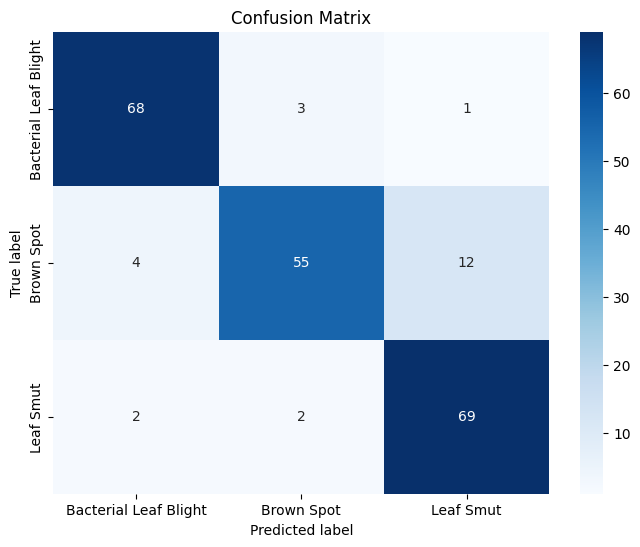


Classification Report:

                       precision    recall  f1-score   support

Bacterial Leaf Blight       0.92      0.94      0.93        72
           Brown Spot       0.92      0.77      0.84        71
            Leaf Smut       0.84      0.95      0.89        73

             accuracy                           0.89       216
            macro avg       0.89      0.89      0.89       216
         weighted avg       0.89      0.89      0.89       216



In [ ]:
# model2
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import random

# Setup
base_path = "rice_leaf_diseases"  # Update this path
categories = ["Bacterial Leaf Blight", "Brown Spot", "Leaf Smut"]
img_size = 180

# Function for manual augmentations
def augment_image(img):
    img = tf.convert_to_tensor(img, dtype=tf.uint8)
    augmented = []

    # Flip
    augmented.append(tf.image.flip_left_right(img).numpy())

    # Rotation
    augmented.append(tf.image.rot90(img, k=1).numpy())
    augmented.append(tf.image.rot90(img, k=3).numpy())

    # Brightness
    augmented.append(tf.image.adjust_brightness(img, 0.1).numpy())
    
    # Contrast
    augmented.append(tf.image.adjust_contrast(img, 1.5).numpy())

    # Zoom
    cropped = tf.image.central_crop(img, 0.8)
    cropped = tf.image.resize(cropped, (img_size, img_size))
    augmented.append(cropped.numpy())

    # Gaussian blur
    blurred = cv2.GaussianBlur(img.numpy(), (5, 5), 0)
    augmented.append(blurred)

    # Add noise
    noise = img.numpy() + np.random.normal(0, 10, img.shape)
    noise = np.clip(noise, 0, 255).astype(np.uint8)
    augmented.append(noise)

    return augmented

# Load and augment data
data, labels = [], []

for label, category in enumerate(categories):
    path = os.path.join(base_path, category)
    images = os.listdir(path)
    for img_name in images:
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)

            # Add augmented versions
            augmented_imgs = augment_image(img)
            for aug in augmented_imgs:
                data.append(aug)
                labels.append(label)

        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

# Shuffle and preprocess
data = np.array(data) / 255.0
labels = to_categorical(labels, num_classes=3)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

# Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict and convert predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
labels = categories

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Classification report (optional, but useful)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels))


In [ ]:
# chage of above code as it is predicting the bacterial correct remaining 2 wrong
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ✅ Setup
base_path = "rice_leaf_diseases"
categories = ["Bacterial Leaf Blight", "Brown Spot", "Leaf Smut"]
img_size = 180

def augment_image(img):
    img = tf.convert_to_tensor(img, dtype=tf.uint8)
    augmented = []

    augmented.append(tf.image.flip_left_right(img).numpy())
    augmented.append(tf.image.rot90(img, k=1).numpy())
    augmented.append(tf.image.adjust_brightness(img, 0.1).numpy())
    augmented.append(tf.image.adjust_contrast(img, 1.5).numpy())

    cropped = tf.image.central_crop(img, 0.85)
    cropped = tf.image.resize(cropped, (img_size, img_size))
    augmented.append(cropped.numpy())

    noise = img.numpy() + np.random.normal(0, 10, img.shape)
    noise = np.clip(noise, 0, 255).astype(np.uint8)
    augmented.append(noise)

    return augmented

# ✅ Load and augment data
data, labels = [], []

min_images = 500  # Set equal count for each class

for label, category in enumerate(categories):
    path = os.path.join(base_path, category)
    images = os.listdir(path)
    selected_imgs = images[:min_images]  # Limit to balance classes

    for img_name in selected_imgs:
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)

            for aug in augment_image(img):
                data.append(aug)
                labels.append(label)

        except Exception as e:
            print(f"❌ Error loading image {img_name}: {e}")

# ✅ Shuffle & preprocess
data = np.array(data) / 255.0
labels = to_categorical(labels, num_classes=3)

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# ✅ Calculate class weights
y_train_labels = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# ✅ Model Architecture (Deeper + Normalized)
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train model with class weights
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test), class_weight=class_weights_dict)

# ✅ Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("✅ Test Accuracy:", acc)

# ✅ Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=categories))

# ✅ Save model
model.save("rice_leaf_disease_model.keras")


c:\Users\rasag\rice-leaf-disease-detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.5585 - loss: 1.5434 - val_accuracy: 0.3214 - val_loss: 1.1525
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8722 - loss: 0.3216 - val_accuracy: 0.3214 - val_loss: 1.4087
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9434 - loss: 0.1910 - val_accuracy: 0.3214 - val_loss: 1.6653
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9687 - loss: 0.1039 - val_accuracy: 0.3214 - val_loss: 1.6668
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9827 - loss: 0.0590 - val_accuracy: 0.3333 - val_loss: 1.5898
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9859 - loss: 0.0436 - val_accuracy: 0.4048 - val_loss: 1.4258
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 91s 4s/step - accuracy: 0.9975 - loss: 0.0273 - val_accuracy: 0.4762 - val_loss: 1.4754
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9915 - loss: 0.0355 - val_accuracy: 0.5179 - val_loss:

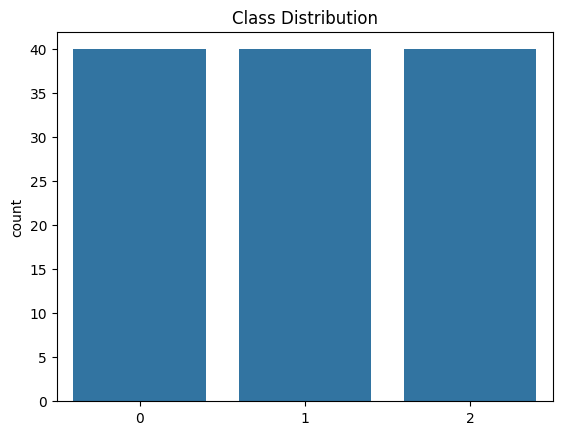

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3581 - loss: 1.0988 - val_accuracy: 0.3421 - val_loss: 1.0987
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 462ms/step - accuracy: 0.3299 - loss: 1.0987 - val_accuracy: 0.3421 - val_loss: 1.0987
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 414ms/step - accuracy: 0.3542 - loss: 1.0986 - val_accuracy: 0.3421 - val_loss: 1.0987
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 413ms/step - accuracy: 0.3229 - loss: 1.0987 - val_accuracy: 0.3421 - val_loss: 1.0987
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 398ms/step - accuracy: 0.3464 - loss: 1.0987 - val_accuracy: 0.3421 - val_loss: 1.0988
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 0.2808 - loss: 1.0992 - val_accuracy: 0.3421 - val_loss: 1.0989
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 453ms/step - accuracy: 0.3928 - loss: 1.0987 - val_accuracy: 0.3421 - val_loss: 1.0991
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 0.3277 - loss: 1.0985 - val_accuracy: 0.3421 - val_loss: 1.

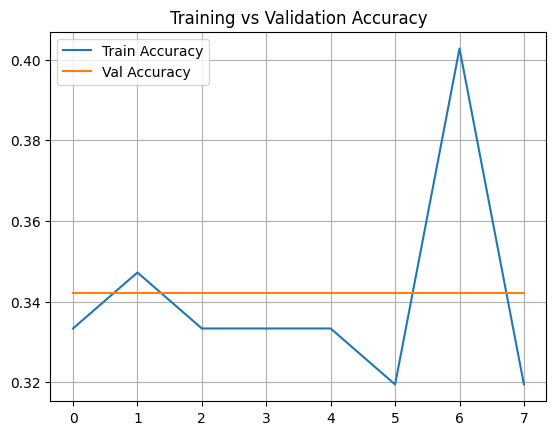

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.3000 - loss: 1.0987

✅ Test Accuracy: 0.30
✅ Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step


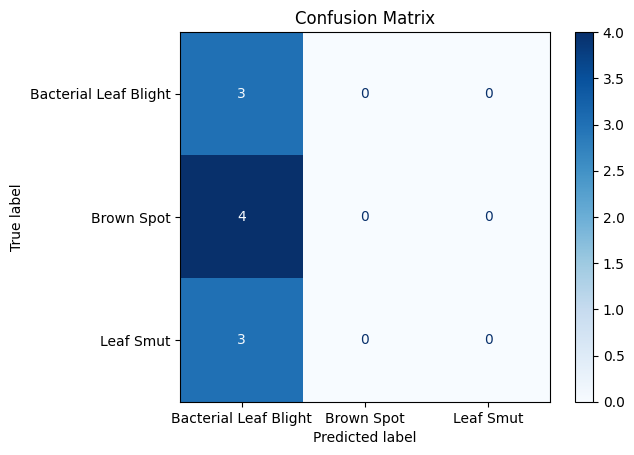

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step


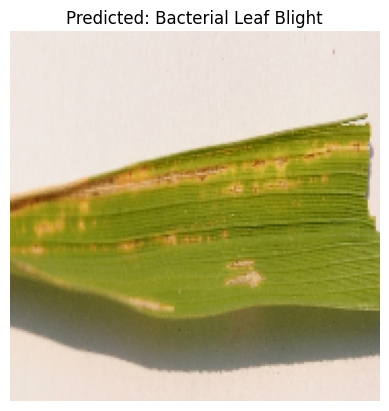

In [3]:
# using pretrained model like mobilnetv2
# !pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pathlib
import random
import tensorflow as tf
from tensorflow.keras import layers, Sequential, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# -----------------------------
# 📁 Load Dataset
# -----------------------------
data_dir = pathlib.Path('./rice_leaf_diseases')

labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
}
labels_dict1 = {0: "Bacterial Leaf Blight", 1: "Brown Spot", 2: "Leaf Smut"}

image_dict = {
    "bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
    "brown": list(data_dir.glob("Brown spot/*")),
    "smut": list(data_dir.glob("Leaf smut/*")),
}

X, y = [], []

for name, images in image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (180, 180))
        X.append(img)
        y.append(labels_dict[name])

X = np.array(X)
y = np.array(y)

# Show class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

# -----------------------------
# 🔀 Train-Validation-Test Split
# -----------------------------
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# -----------------------------
# 🔄 Data Augmentation
# -----------------------------
data_augmentation = Sequential([
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal"),
])

# -----------------------------
# 🔍 Model Using MobileNetV2
# -----------------------------
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(180, 180, 3),
    include_top=False,
    weights=None  # ⬅️ Use random weights to avoid download
)
base_model.trainable = False  # Freeze base model

model = Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# ⏱ Early Stopping
# -----------------------------
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# -----------------------------
# 🧠 Train the Model
# -----------------------------
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    callbacks=[early_stopping])

# -----------------------------
# 📉 Plot Accuracy
# -----------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 🧪 Evaluate on Test Set
# -----------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.2f}")

# -----------------------------
# 📥 Save Model
# -----------------------------
model.save("rice_leaf_disease_model.keras")
print("✅ Model saved successfully!")

# -----------------------------
# 📊 Confusion Matrix
# -----------------------------
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=list(labels_dict1.values()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# -----------------------------
# 🔮 Predict on Random Image
# -----------------------------
all_images = list(data_dir.glob("*/*"))
random_image_path = random.choice(all_images)

new_image = cv2.imread(str(random_image_path))
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
new_image_resized = cv2.resize(new_image, (180, 180))
input_image = new_image_resized / 255.0
input_image = np.expand_dims(input_image, axis=0)

prediction = model.predict(input_image)
predicted_class = np.argmax(prediction)
predicted_label = labels_dict1[predicted_class]

plt.imshow(new_image_resized)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import cv2
# import pathlib
# import random
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers, Sequential
# from sklearn.model_selection import train_test_split

# # Path to dataset folder
# data_dir = pathlib.Path('./rice_leaf_diseases')

# # Label dictionary for the classes
# labels_dict = {
#     'bacteria': 0,
#     'brown': 1,
#     'smut': 2,
# }

# # Create a dictionary containing images of each disease
# image_dict = {
#     "bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
#     "brown": list(data_dir.glob("Brown spot/*")),
#     "smut": list(data_dir.glob("Leaf smut/*")),
# }

# # Prepare dataset X (images) and y (labels)
# X, y = [], []

# for name, images in image_dict.items():
#     for image in images:
#         img = cv2.imread(str(image))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
#         resized_img = cv2.resize(img, (180, 180))
#         X.append(resized_img)
#         y.append(labels_dict[name])

# X = np.array(X)
# y = np.array(y)

# # Split dataset into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=0)

# # Normalize the images
# X_train_scaled = X_train / 255.0
# X_val_scaled = X_val / 255.0
# X_test_scaled = X_test / 255.0

# # Data Augmentation Pipeline
# data_augmentation = Sequential([
#     layers.RandomZoom(0.2),
#     layers.RandomRotation(0.1),
#     layers.RandomFlip("horizontal")
# ])

# # Build the CNN Model (removed LSTM since images are not sequences)
# num_classes = 3

# model = Sequential([
#     data_augmentation,

#     # CNN Layers for feature extraction
#     layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),

#     # Flatten the CNN output
#     layers.Flatten(),

#     # Fully connected layers
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax')  # Added softmax activation
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# # Implement Early Stopping to prevent overfitting
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=5, restore_best_weights=True
# )

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=40, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
# print(f"Test Accuracy: {test_acc:.2f}")

# # Make predictions on the test set
# predictions = model.predict(X_test_scaled)

# # Random image prediction
# all_images = list(data_dir.glob("*/*"))
# random_image_path = random.choice(all_images)

# # Load and preprocess the random image
# new_image = cv2.imread(str(random_image_path))
# new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
# new_image = cv2.resize(new_image, (180, 180))
# new_image = new_image / 255.0
# new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# # Predict the class for the new image
# labels_dict1 = {0: "Bacterial Leaf Blight", 1: "Brown Spot", 2: "Leaf Smut"}
# predicted_value = model.predict(new_image)
# predicted_class = np.argmax(predicted_value)
# predicted_label = labels_dict1[predicted_class]

# print(f"Predicted Class: {predicted_label}")

# # Display the image and its predicted label
# plt.axis('off')
# plt.imshow(new_image[0])
# plt.title(f"Predicted: {predicted_label}")
# plt.show()


In [2]:
model.save("rice_leaf_disease_model.keras")


In [1]:
# with ensemble learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pathlib
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# ✅ Set path
data_dir = pathlib.Path('rice_leaf_diseases')
# ✅ Label mapping
labels_dict = {'bacteria': 0, 'brown': 1, 'smut': 2}
labels_dict1 = {0: "Bacterial Leaf Blight", 1: "Brown Spot", 2: "Leaf Smut"}

# ✅ Load dataset
image_dict = {
    "bacteria": list(data_dir.glob("Bacterial leaf blight/*")),
    "brown": list(data_dir.glob("Brown spot/*")),
    "smut": list(data_dir.glob("Leaf smut/*")),
}

X, y = [], []

for label, images in image_dict.items():
    print(f"🔍 Loading {label}: {len(images)} images")
    for img_path in images:
        img = cv2.imread(str(img_path))
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (180, 180))
        X.append(img)
        y.append(labels_dict[label])

X = np.array(X)
y = np.array(y)

print(f"\n✅ Total samples: {len(X)}")
print(f"✅ Class distribution: {np.bincount(y.astype(int))}")

# ✅ Normalize
X = X / 255.0

# ✅ Train-val-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# ✅ Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

# ✅ Model builder
def build_model(seed):
    tf.random.set_seed(seed)
    model = models.Sequential([
        layers.Input(shape=(180, 180, 3)),
        data_augmentation,
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ✅ Ensemble training
ensemble_models = []
num_models = 5

for i in range(num_models):
    print(f"\n🚀 Training model {i+1}/{num_models}")
    model = build_model(seed=42 + i)
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)
    ensemble_models.append(model)

# ✅ Ensemble prediction
def ensemble_predict(models, X):
    preds = [model.predict(X, verbose=0) for model in models]
    avg_preds = np.mean(preds, axis=0)
    return np.argmax(avg_preds, axis=1)

# ✅ Evaluate
ensemble_preds = ensemble_predict(ensemble_models, X_test)
acc = np.mean(ensemble_preds == y_test)
print(f"\n✅ Ensemble Accuracy on Test Set: {acc:.2f}")

🔍 Loading bacteria: 40 images
🔍 Loading brown: 40 images
🔍 Loading smut: 40 images

✅ Total samples: 120
✅ Class distribution: [40 40 40]

🚀 Training model 1/5
Epoch 1/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 946ms/step - accuracy: 0.3385 - loss: 1.7480 - val_accuracy: 0.3333 - val_loss: 1.3524
Epoch 2/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 704ms/step - accuracy: 0.3446 - loss: 1.2290 - val_accuracy: 0.3333 - val_loss: 1.0975
Epoch 3/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - accuracy: 0.3633 - loss: 1.1002 - val_accuracy: 0.5417 - val_loss: 1.0258
Epoch 4/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 722ms/step - accuracy: 0.5326 - loss: 1.0325 - val_accuracy: 0.7083 - val_loss: 0.9000
Epoch 5/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step - accuracy: 0.4796 - loss: 1.0025 - val_accuracy: 0.6250 - val_loss: 0.8246
Epoch 6/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 622ms/step - accuracy: 0.5777 - loss: 0.9320 - val_accuracy: 0.7917 - val_loss: 0.7479
Epoch 7/40
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.5495 - loss: 0.8818 

In [2]:
import pickle

# ✅ Save the first two models
ensemble_models[0].save("model1.h5")
ensemble_models[1].save("model2.h5")

# ✅ Create the bundle
bundle = {
    "model1_path": "model1.h5",
    "model2_path": "model2.h5",
    "labels_dict": labels_dict1
}

# ✅ Save to a .pkl file
with open("ensemble_model_bundle.pkl", "wb") as f:
    pickle.dump(bundle, f)

print("\n📦 ensemble_model_bundle.pkl saved successfully!")



📦 ensemble_model_bundle.pkl saved successfully!
